In [11]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
import fiona
import os
import seaborn as sns
import matplotlib.pyplot as plt
current_dir=os.getcwd()
current_dir
#help(fiona.open)

#Load reservoirs brazil 
#Load orbits from satellites 
#Intercept each layer with nadir altimeter satellite tracks 
#Obtain from the interception 
#Calculate distribution of areas between duplicate and not duplicate lakes: Duplicate only means that hydrolakes have more than one lake in the brazilian dataset 

'/home/angelica/Documents/py_linux/pylocss/src'

In [12]:
#Get world map
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

south_america = world.query('continent == "South America"')
#world['continent'].unique()
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

/home/angelica/.conda/envs/geo_env/lib/python3.10/site-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/home/angelica/.conda/envs/geo_env/lib/python3.10/site-packages/geoplot/geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

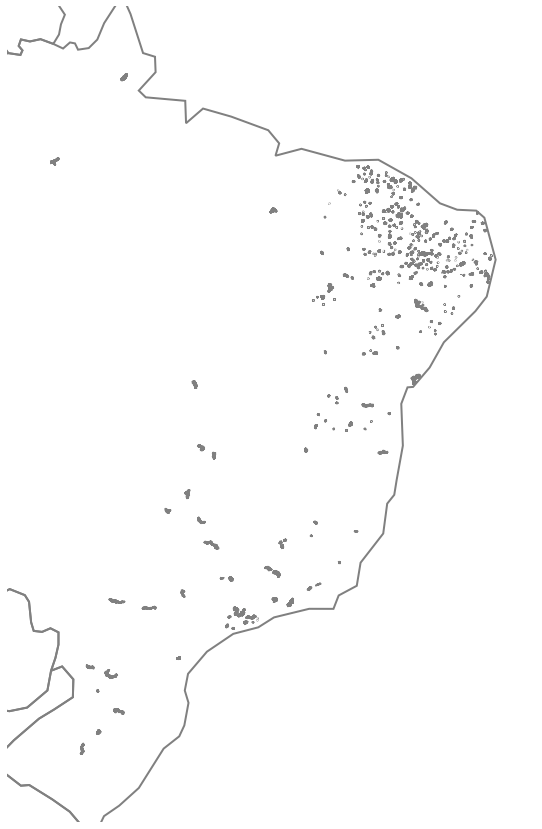

In [18]:
#read shapefiles
#Read joined brazil and and hydrolakes lakes

shp_dir='../data/spatial/'
shp_name='joined_hydrolakes_brazilr.shp'
gdf_lake_br_hl=gpd.read_file(shp_dir + shp_name)

#Read all satellite altimeters tracks
gdf_S3A=gpd.read_file('/home/angelica/Dropbox/Research/LOCSS/SatelliteTrack/S3A_orbits_single_continent.shp')
gdf_S3B=gpd.read_file('/home/angelica/Dropbox/Research/LOCSS/SatelliteTrack/S3B_orbits_single_continent.shp')
gdf_RJO=gpd.read_file('/home/angelica/Dropbox/Research/LOCSS/SatelliteTrack/RefOrbit_J3J2J1TP_Tracks_single_continent.shp')
gdf_JIn=gpd.read_file('/home/angelica/Dropbox/Research/LOCSS/SatelliteTrack/J1TP_Interlaced_tracks_single_continent.shp')
ax = gplt.polyplot(south_america, edgecolor='gray', figsize = (20,15))
gplt.choropleth(gdf_lake_br_hl, hue = gdf_lake_br_hl['area_km'], edgecolor = 'gray', cmap='Greens', ax=ax)

Index(['gid', 'esp_cd', 'cod_snisb', 'cod_sar', 'nmoriginal', 'nmalternat',
       'nmgenerico', 'nmligacao', 'nmespecifi', 'detipomass', 'dedominial',
       'dedominio', 'defiscaliz', 'nmemp', 'fonmemp', 'dtreserv', 'fodtreserv',
       'nuvolumhm3', 'fonuvolume', 'nuperimkm', 'nuareakm2', 'nuareaha',
       'nucompgeom', 'usoprinc', 'fousoprinc', 'detipoapr', 'detipomda',
       'salinidade', 'regime', 'nmriocomp', 'nmufe', 'nmmun', 'defonte',
       'desatelite', 'deversao', 'deobs', 'nuvzreg', 'nuvzlago', 'nuvzdeflu',
       'cdtipooper', 'detipooper', 'fovzlago', 'fovzdeflu', 'fovzreg',
       'cobarprin', 'cotrecho', 'nuvzrecebe', 'nuvztransf', 'deobsvazao',
       'cocda2013', 'cocda2017', 'area_km', 'Hylak_id', 'Lake_name', 'Country',
       'Continent', 'Poly_src', 'Lake_type', 'Grand_id', 'Lake_area',
       'Shore_len', 'Shore_dev', 'Vol_total', 'Vol_res', 'Vol_src',
       'Depth_avg', 'Dis_avg', 'Res_time', 'Elevation', 'Slope_100',
       'Wshd_area', 'Pour_long', 'Pour_

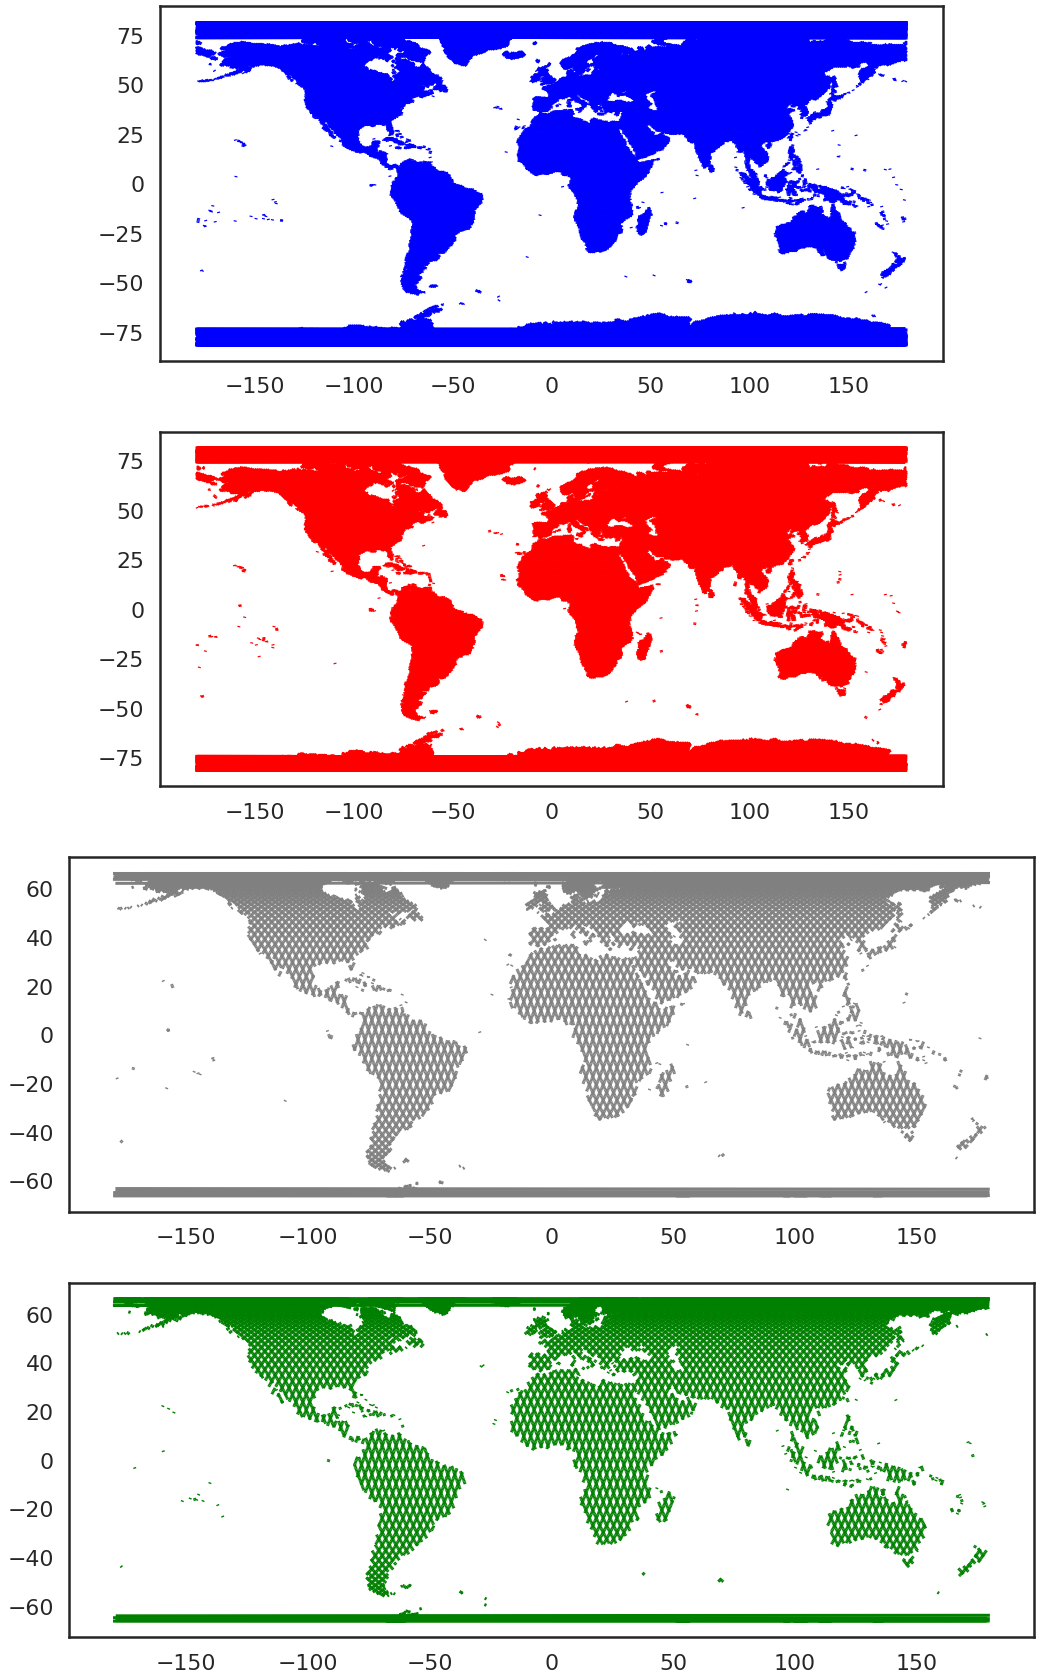

In [27]:
#Verify all the orbits
fig, ax = plt.subplots(4,1, figsize=(20,30))
gdf_S3A.plot(color='blue', markersize=0.5, ax=ax[0])
gdf_S3B.plot(ax=ax[1], markersize=0.5, color='red')
gdf_RJO.plot(ax=ax[2], markersize=0.5, color='grey')
gdf_JIn.plot(ax=ax[3], markersize=0.5, color='green')
#get the columns
gdf_lake_br_hl.columns

#For codes of brazil cod_sar


In [68]:
#Test list
n_S3A=gdf_S3A['Name'][0][0:3]
n_S3B=gdf_S3B['Name'][0][0:3]
n_RJO=gdf_RJO['Name'][0][0:8]
n_JIn=gdf_JIn['Name'][0][0:6]
gdf_orbit_coll={n_S3A:gdf_S3A,
            n_S3B:gdf_S3B,
            n_RJO:gdf_RJO,
            n_JIn:gdf_JIn}

n_orbits=[n_S3A, n_S3B, n_RJO, n_JIn]

In [ ]:
#set crs for brazil reservoirs
gdf_lake_br_hl=gdf_lake_br_hl.set_crs(epsg=4674).to_crs(epsg=4326)

/home/angelica/.conda/envs/geo_env/lib/python3.10/site-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


ValueError: The input provided to 'hue' contains duplicate values in its index, which is not allowed. Try using pandas.Series.drop_duplicates or pandas.DataFrame.drop_duplicates to remove the extra values.

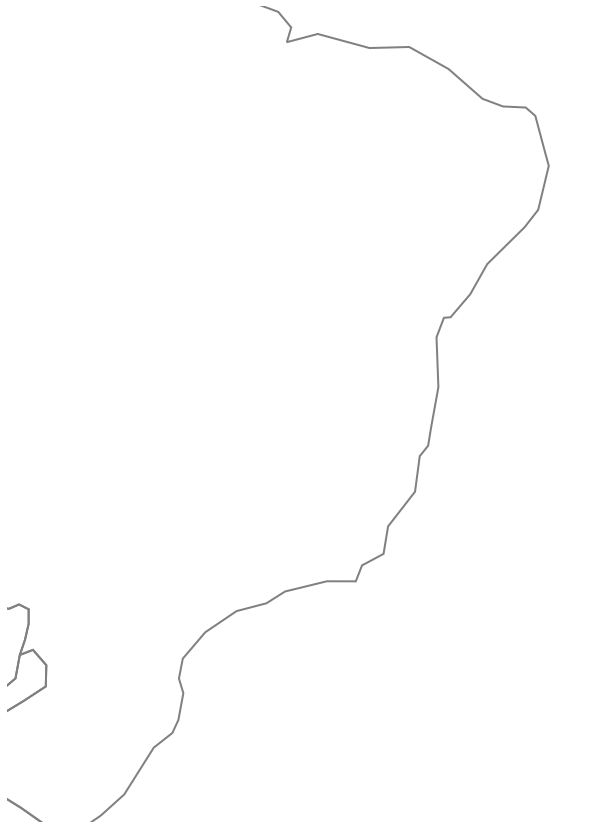

In [88]:
# Get the intercepted geometries 
ax = gplt.polyplot(south_america, edgecolor='gray', figsize = (20,15))
for orbit_name in n_orbits:
    gdf_orbit=gdf_orbit_coll[orbit_name]
    gdf = gpd.sjoin(gdf_lake_br_hl, 
                         gdf_orbit, 
                         how="inner", 
                         predicate='intersects')
    #print(orbit_name, gdf.shape)
    print(gdf.columns)
    gplt.choropleth(gdf,hue = gdf['cod_sar']+gdf['Hylak_id'], edgecolor = 'gray', cmap='Greens', ax=ax)

In [87]:
gdf['cod_sar']+gdf['Hylak_id']
#ax1 = gplt.polyplot(south_america, edgecolor='gray', figsize = (20,15))
#fig, ax = plt.subplots(4,1, figsize=(20,20))
#ax[0]=gdf.plot(color='blue', markersize=0.5, ax=ax1)
#minx, miny, maxx, maxy = gdf.total_bounds
#ax1.set_xlim(minx, maxx)
#ax1.set_ylim(miny, maxy)
#gdf_S3B.plot(ax=ax[1], markersize=0.5, color='red')
#gdf_RJO.plot(ax=ax[2], markersize=0.5, color='grey')
#gdf_JIn.plot(ax=ax[3], markersize=0.5, color='green')

21      130330.0
33     1100688.0
199     131289.0
82      131115.0
105      29115.0
139      29400.0
139      29400.0
153     131212.0
175      29399.0
176    1118835.0
177    1118838.0
229      39355.0
238      29286.0
245      29465.0
330      22323.0
331    1100674.0
dtype: float64

In [7]:
#extract duplicated lakes
gdf_duplicated=gdf_lake_br_hl.loc[gdf_lake_br_hl.duplicated(subset=['cod_sar'], keep=False)].copy()
gdf_not_duplicated=gdf_lake_br_hl.loc[~gdf_lake_br_hl.duplicated(subset=['cod_sar'], keep=False)].copy()
print(gdf_duplicated.shape, gdf_not_duplicated.shape)

gdf_duplicated=gdf_br.loc[gdf_br.duplicated(subset=['cod_sar'], keep=False)].copy()
gdf_not_duplicated=gdf_br.loc[~gdf_br.duplicated(subset=['cod_sar'], keep=False)].copy()
print(gdf_duplicated.shape, gdf_not_duplicated.shape)
#I have 82 duplicates and 341 not duplicate from the pre

(82, 74) (341, 74)
(72, 80) (67, 80)


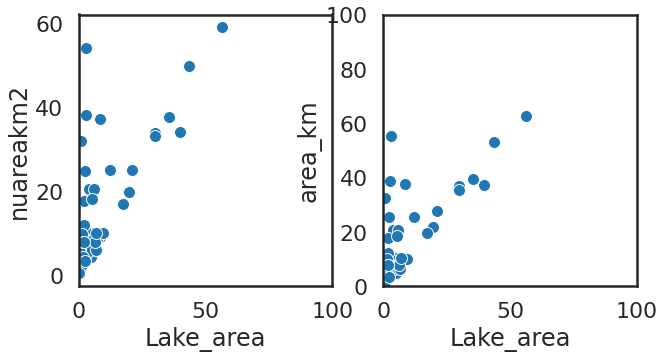

In [8]:
#plot areas between lakes from hydrolakes and brazilian lakes (reservoirs)

sns.set_style('white')
sns.set_context('poster', font_scale=1.0)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

df=gdf_not_duplicated[['area_km','Lake_area', 'nuareakm2']].copy()

facet_c='gauge_id'
x_field='Lake_area'
y_field='nuareakm2'
facet_c='Country_State'
y_lim=[0,100]
#kind_plot='line'
sns.scatterplot(data=df,x=x_field,y=y_field,#hue=hue,
             #legend=True, color=palette,
             #kind=kind_plot,
             #col_wrap=3,
             #col=facet_c,# col_order=facet_c_order,
             #row=facet_r,row_order=facet_r_order,
             #aspect=.9,
             #height=10, 
             ax=axes[0])
plt.xlim(y_lim[0],y_lim[1])
plt.ylim(y_lim[0],y_lim[1])
y_field='area_km'
sns.scatterplot(data=df,x=x_field,y=y_field,#hue=hue,
             #legend=True, color=palette,
             #kind=kind_plot,
             #col_wrap=3,
             #col=facet_c,# col_order=facet_c_order,
             #row=facet_r,row_order=facet_r_order,
             #aspect=.9,height=10, 
             ax=axes[1])
#g_n.set_xticklabels(rotation=90, horizontalalignment='right')
plt.xlim(y_lim[0],y_lim[1])
plt.ylim(y_lim[0],y_lim[1])
#g_n.savefig('../data/20220204.png')

plt.show()
del df

(18, 81)

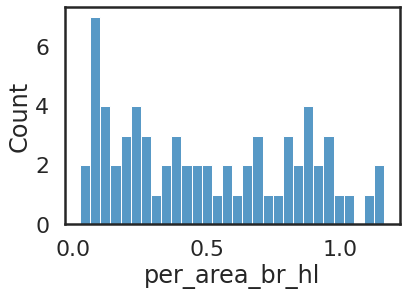

In [10]:
#Get an area index and take only those greater than the 80% of the reservoirs
#'per_area_br_hl' percentage of the area between brazilian lakes and hydrolakes 
gdf_not_duplicated['per_area_br_hl']=gdf_not_duplicated['Lake_area']/gdf_not_duplicated['nuareakm2']
sns.histplot(data=gdf_not_duplicated, x="per_area_br_hl", bins=30)
gdf_not_duplicated['per_area_br_hl'].describe()
gdf_not_duplicated.loc[gdf_not_duplicated['per_area_br_hl']>0.8].shape